Se utilizará Keras para clasificar las imágenes del conjunto de datos MNIST. Está compuesto por 70.000 ejemplos de dígitos escritos a mano por diferentes personas. Los primeros 60.000 se utilizan para el entrenamiento y los 10.000 restantes para las pruebas:


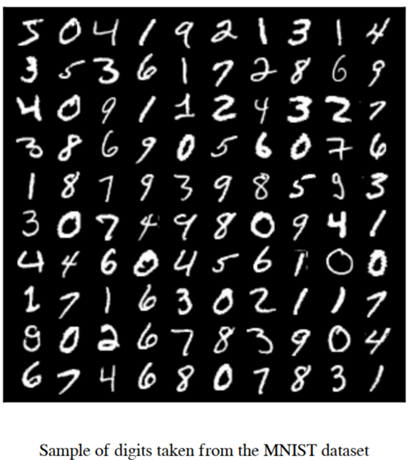

### **Importación de dataset y Librerías**

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

### **Importación de datos de entrenamiento y testeo**

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### **Procesamiento de Datos**
Es necesario modificar los datos para poder utilizarlos. X_train contiene 60.000 imágenes de 28 x 28 píxeles, y X_test contiene 10.000. Para llevar los datos a la red como entrada, es necesario convertir las matrices en un vector de 784 pixeles.

In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

Las etiquetas indican el valor del dígito representado en las imágenes. Queremos convertir esto en un vector codificado de 10 entradas, compuesto por ceros y sólo un 1 en la entrada correspondiente al dígito.

Por ejemplo, el 4 se asigna a [0, 0, 0,0, 1, 0, 0, 0, 0, 0]. Por el otro lado, nuestra red tendrá 10 neuronas de salida:

In [4]:
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

### **Arquitectura de la RED**

Es necesario definir el tamaño de la capa de entrada (el tamaño de las imágenes MNIST), el número de neuronas ocultas, el número de épocas para entrenar la red, y el tamaño del mini lote:

In [5]:
input_size = 784
batch_size = 200
hidden_neurons = 100
epochs = 100

Se Utilizá una red con una capa oculta, activación sigmoidea y salida softmax:

In [6]:
model = Sequential([Dense(hidden_neurons, input_dim=input_size),Activation('sigmoid'),Dense(classes),Activation('softmax')])

### **Características del modelo**

In [7]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

### **Entrenamientos del modelo**

In [9]:
model.fit(X_train, Y_train, batch_size=batch_size,validation_data=(X_test, Y_test), epochs=epochs,verbose=1)

Epoch 1/100
300/300 [==============================] - 16s 7ms/step - loss: 1.0480 - accuracy: 0.7004 - val_loss: 0.3826 - val_accuracy: 0.9010
Epoch 2/100
300/300 [==============================] - 2s 5ms/step - loss: 0.3637 - accuracy: 0.9022 - val_loss: 0.2938 - val_accuracy: 0.9191
Epoch 3/100
300/300 [==============================] - 2s 5ms/step - loss: 0.3014 - accuracy: 0.9158 - val_loss: 0.2735 - val_accuracy: 0.9215
Epoch 4/100
300/300 [==============================] - 2s 5ms/step - loss: 0.2731 - accuracy: 0.9212 - val_loss: 0.2525 - val_accuracy: 0.9250
Epoch 5/100
300/300 [==============================] - 2s 5ms/step - loss: 0.2589 - accuracy: 0.9275 - val_loss: 0.2335 - val_accuracy: 0.9301
Epoch 6/100
300/300 [==============================] - 2s 5ms/step - loss: 0.2324 - accuracy: 0.9333 - val_loss: 0.2260 - val_accuracy: 0.9355
Epoch 7/100
300/300 [==============================] - 2s 5ms/step - loss: 0.2241 - accuracy: 0.9341 - val_loss: 0.2203 - val_accuracy: 0.935

### **Evaluación del modelo**

In [11]:
score = model.evaluate(X_test, Y_test, verbose=1) 
print('Test accuracy:', score[1]*100, '%')

313/313 [==============================] - 1s 2ms/step - loss: 0.1324 - accuracy: 0.9590
Test accuracy: 95.89999914169312 %


La precisión de la prueba será de alrededor del 96%, lo que no es un gran resultado, pero este ejemplo se ejecuta en menos de 30 segundos en una CPU. Se podrían hacer algunas mejoras simples, como un mayor número de neuronas ocultas, o un mayor número de épocas.

### **Aprendizaje de la Red**

Para ver lo que ha aprendido la red, podemos visualizar los pesos de la capa oculta. El siguiente código nos permite obtenerlos:




In [ ]:
weights = model.layers[0].get_weights()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy
fig = plt.figure()
w = weights[0].T
for neuron in range(hidden_neurons):
  ax = fig.add_subplot(10, 10, neuron + 1)
  ax.axis("off")
  ax.imshow(numpy.reshape(w[neuron], (28, 28)), cmap=cm.Greys_r)
plt.savefig("neuron_images.png", dpi=300)
plt.show()

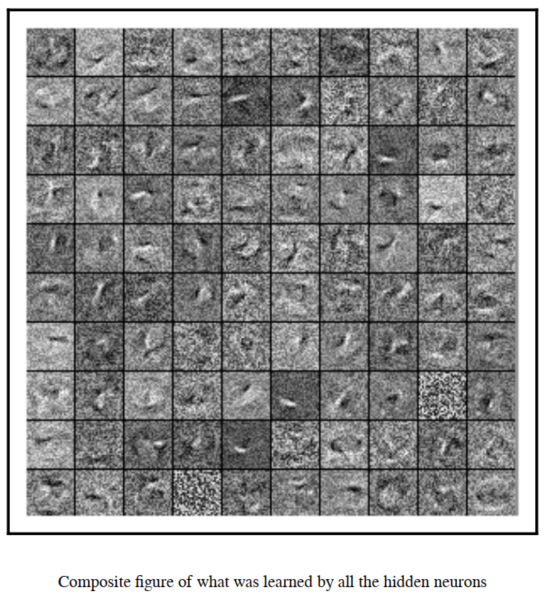

Para simplificar, hemos agregado las imágenes de todas las neuronas en una sola figura que representa un compuesto de todas las neuronas. Evidentemente, como las imágenes iniciales son muy pequeñas y no tienen muchos detalles (son sólo dígitos), las características aprendidas por las neuronas ocultas no son tan interesantes. Pero ya está claro que cada neurona está aprendiendo una forma diferente.
